# Task 1

## Used packages

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.constants as const
from matplotlib.pyplot import figure
# matplotlib.rcParams['text.usetex'] = True

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Computer Modern Roman"],
# })

## Used functions

[-4.77836767e+02  5.24405074e-04  2.39418701e+02  2.38417541e+02]


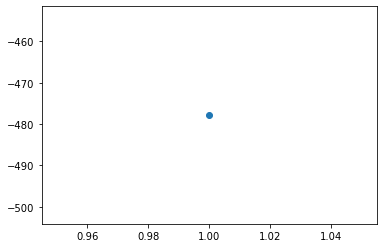

In [21]:
# initial parameters

h_dash = 1
h = 2 * np.pi
m_e = h_dash
e = h_dash
pi = np.pi
m_p = 1836.15 * m_e 

A_Li = 152.1    #in MHz
A_Rb = 1011.9

S_Li = 0.5
S_Rb = S_Li

I_Li = 1
I_Rb = 5 / 2

mu_B = (e * h_dash) / (2 * m_e)    # Bohr magneton in atomic units
mu_N = (e * h_dash) / (2 * m_p)    # Nuclear magneton in atomic units

g_e = 2.002319
g_N_Li = -0.000447
g_N_Rb = -0.000294

B_min = 1
B_max = 2000    # Magnetic field gauss units
samples = 1000
n = 4

B = np.linspace(B_min, B_max, samples)  
# B

#  For Lithium and B_min

g_e_mu_B_B0 = g_e * mu_B * B_min * 0.5
g_n_mu_K_B0 = g_N_Li * mu_N * B_min * 0.5
hA4 = h * A_Li / 4

H_matrix = np.zeros((n, n))

# Diagonal elements
H_matrix[0][0] = g_e_mu_B_B0 - g_n_mu_K_B0 + hA4
H_matrix[1][1] = g_e_mu_B_B0 + g_n_mu_K_B0 - hA4
H_matrix[2][2] = - g_e_mu_B_B0 - g_n_mu_K_B0 - hA4
H_matrix[3][3] = - g_e_mu_B_B0 + g_n_mu_K_B0 + hA4

H_matrix[2][1] = hA4
H_matrix[1][2] = hA4

w, v = np.linalg.eig(H_matrix) # w eigenvalues and v eigenvectors
print(w)
# H_matrix

plt.scatter(B_min, w[0])

# Probably I have to populate H_matrix using formula on slide 18, maybe it would work
# Simply make one big function to do this
# I have to convert gauss --> SI --> atomic units
